In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from metrics import mae_metric, rmse_metric, pearsonr_metric

In [7]:
df = pd.read_csv("output_tquest_ner.csv").drop(columns=["Unnamed: 0","Unnamed: 0.1","Unnamed: 0.2"])
df.head(2)

,src,mt,pe,avg_len,mtr_score,ref_len,nst_score,nst_blc_score,final_score,transquest,new_src,new_mt,tquest_ner
0,José Ortega y Gasset visited Husserl at Freibu...,1934 besuchte José Ortega y Gasset Husserl in ...,José Ortega y Gasset besuchte Husserl in Freib...,12,0.794492,12,3.116148,4.331309,0.808846,0.744348,David visited David at Paris in this year.,1934 besuchte José Ortega y Gasset Husserl in ...,0.610718
1,"however , a disappointing ninth in China meant...",eine enttäuschende Neunte in China bedeutete j...,ein enttäuschender neunter Platz in China bede...,20,0.903902,20,3.608044,4.174426,0.890099,0.733772,"however, a disappointing ninth in Paris meant ...",eine enttäuschende Neunte in Himalaya bedeutet...,0.722968


In [8]:
# ner : 
print(df["src"][0])
print(df["new_src"][0])
print(df["mt"][0])
print(df["new_mt"][0])

José Ortega y Gasset visited Husserl at Freiburg in 1934 .
David visited David at Paris in this year.
1934 besuchte José Ortega y Gasset Husserl in Freiburg .
1934 besuchte José Ortega y Gasset Husserl in Himalaya.


In [9]:
sample = df.sample(n=500) 

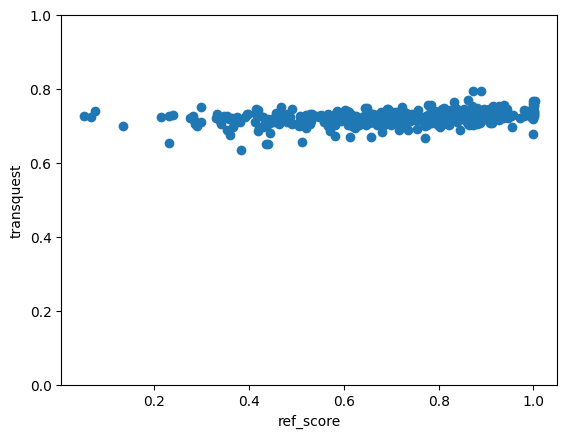

In [10]:
plt.scatter(sample["final_score"],sample["transquest"])
plt.ylim(0,1)
plt.ylabel("transquest")
plt.xlabel("ref_score")
plt.savefig("/home/slim/Documents/tex/ter/img/tq.png")

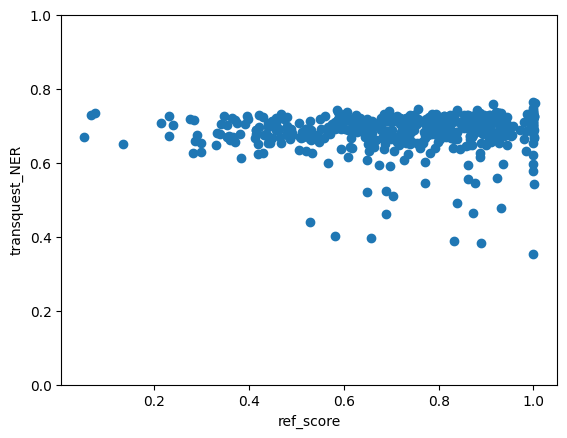

In [11]:
plt.scatter(sample["final_score"],sample["tquest_ner"])
plt.ylim(0,1)
plt.ylabel("transquest_NER")
plt.xlabel("ref_score")
plt.savefig("/home/slim/Documents/tex/ter/img/tqner.png")

In [12]:
# post_evaluation: 
df["diff"] = (abs(df['final_score']- df['transquest'])- abs(df['final_score']-df['tquest_ner']))
df_diff = df[abs(df['diff'])>0.15]
df_diff.shape

(138, 14)

In [13]:
df_diff.to_csv("score_conflict.csv")

Text(0.5, 0, 'ref_score')

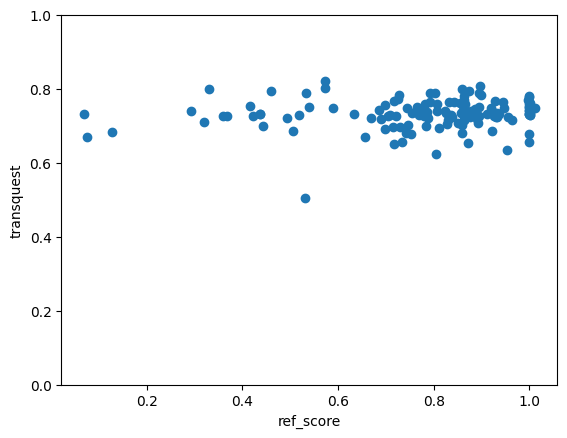

In [14]:
plt.scatter(df_diff["final_score"],df_diff["transquest"])
plt.ylim(0,1)
plt.ylabel("transquest")
plt.xlabel("ref_score")

Text(0.5, 0, 'ref_score')

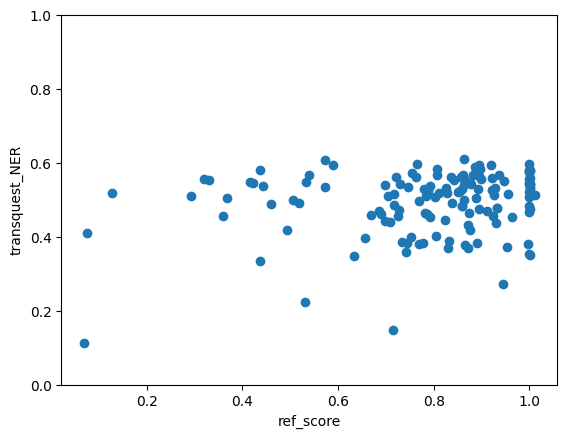

In [15]:
plt.scatter(df_diff["final_score"],df_diff["tquest_ner"])
plt.ylim(0,1)
plt.ylabel("transquest_NER")
plt.xlabel("ref_score")

In [16]:
with open('score_conflit_sentences.txt', 'w') as file:
    for i in (df_diff.index.tolist()):
        file.write(F"src    : {df_diff['src'][i]}\n")
        file.write(F"new_src: {df_diff['new_src'][i]}\n")
        file.write(F"mt     : {df_diff['mt'][i]}\n")
        file.write(F"new_mt : {df_diff['new_mt'][i]}\n")
        file.write(F"f_score: {df_diff['final_score'][i]}\n")
        file.write(F"tquest : {df_diff['transquest'][i]}\n")
        file.write(F"tq_ner : {df_diff['tquest_ner'][i]}\n")
        file.write(F"diff   : {df_diff['diff'][i]}\n")

In [17]:
# ner vs expert     
def metrics_show(y1,y2):
    print(mae_metric(y1,y2))
    print(rmse_metric(y1,y2))
    print(pearsonr_metric(y1,y2))

In [18]:
df_expert = pd.read_csv("exprt.csv")

In [19]:
metrics_show(df_expert["expert_score"], df["final_score"])

Mean absolute error: 0.262
Root mean squared error: 0.324
Pearson correlation coefficient: 0.125


In [20]:
metrics_show(df_expert["expert_score"], df["transquest"])

Mean absolute error: 0.214
Root mean squared error: 0.279
Pearson correlation coefficient: 0.287


In [21]:
metrics_show(df_expert["expert_score"], df["tquest_ner"])

Mean absolute error: 0.195
Root mean squared error: 0.260
Pearson correlation coefficient: 0.099


In [22]:
def dist_plot(df, col):
    bins = [i/10 for i in range(11)]
    groups = df.groupby(pd.cut(df[col], bins))
    counts = groups.size()
    counts.plot(kind='bar')
    plt.xlabel('score ranges')
    plt.ylabel('Count')
    plt.title('sentence count')
    plt.savefig(F"/home/slim/Documents/tex/ter/img/dist_{col}.png")


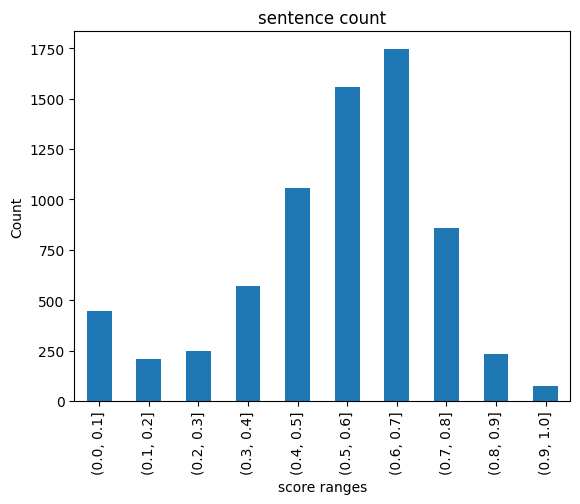

In [23]:
dist_plot(df_expert, "expert_score")

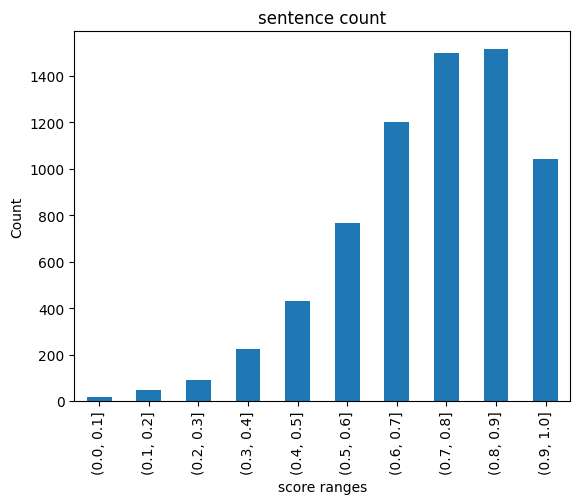

In [24]:
dist_plot(df, "final_score")

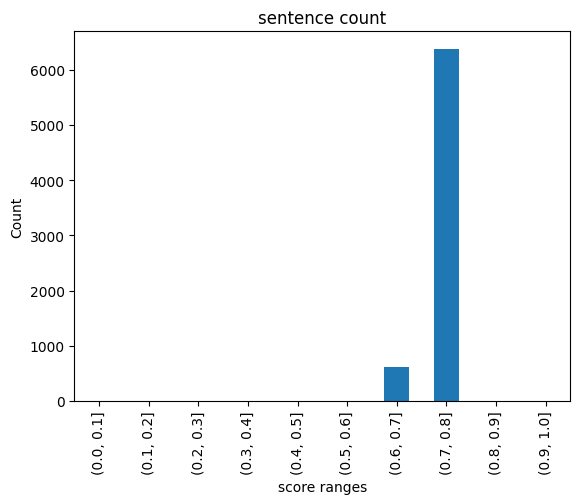

In [25]:
dist_plot(df, "transquest")

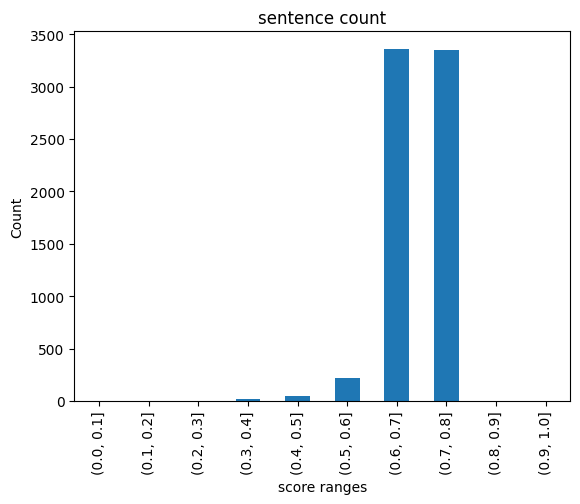

In [26]:
dist_plot(df, "tquest_ner")

NER model test

In [27]:
# z_mean vs TquestNer

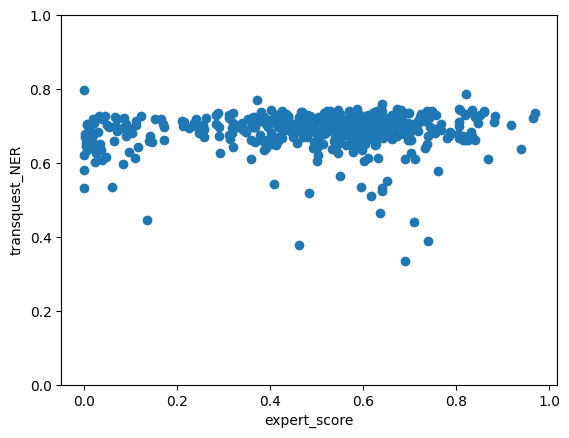

In [28]:
plt.scatter(df_expert[0:500]["expert_score"],df[0:500]["tquest_ner"])
plt.ylim(0,1)
plt.ylabel("transquest_NER")
plt.xlabel("expert_score")
plt.savefig("/home/slim/Documents/tex/ter/img/expert_vs_tquestNER.png")